In [4]:
import h2o
from h2o.estimators import H2OUpliftRandomForestEstimator
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,49 mins 09 secs
H2O_cluster_timezone:,America/Santiago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 15 days
H2O_cluster_name:,H2O_from_python_mwils_47jp78
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.183 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [5]:
# Import the cars dataset into H2O:
data = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/uplift/criteo_uplift_13k.csv")
print(data.head())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
23.4463,10.0597,8.21438,4.67988,10.2805,4.11545,-12.1104,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
23.9389,10.0597,8.21438,4.67988,10.2805,4.11545,-1.28821,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
24.5696,10.0597,8.21438,4.67988,10.2805,4.11545,-7.01175,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
22.0398,10.0597,8.21438,4.67988,10.2805,4.11545,-1.28821,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
26.1999,10.0597,8.21438,4.67988,10.2805,4.11545,-8.05886,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
25.5108,10.0597,9.00485,4.67988,10.2805,4.11545,-1.28821,4.83381,3.9554,13.1901,5.30037,-0.168679,1,0,0,0
23.4791,10.0597,8.21438,4.67988,10.2805,4.11545,-5.57641,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
26.1892,10.0597,8.21438,4.67988,10.2805,4.11545,-5.57641,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
26.202,10.0597,8.21438,4.67988,10.2805,4.11545,-5.11667,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0
23.304,10.0597,8.21438,4.67988,10.2805,4.11545,-5.57641,4.83381,3.97186,13.1901,5.30037,-0.168679,1,0,0,0


In [7]:
# Set the predictors, response, and treatment column:
predictors = ["f1", "f2", "f3", "f4", "f5", "f6","f7", "f8"]
# set the response as a factor
response = "conversion"
data[response] = data[response].asfactor()
# set the treatment as a factor
treatment_column = "treatment"
data[treatment_column] = data[treatment_column].asfactor()
# Split the dataset into a train and valid set:
train, valid = data.split_frame(ratios=[.8], seed=1234)


In [8]:
# Build and train the model:
uplift_model = H2OUpliftRandomForestEstimator(ntrees=10,
                                              max_depth=5,
                                              treatment_column=treatment_column,
                                              uplift_metric="KL",
                                              min_rows=10,
                                              seed=1234,
                                              auuc_type="qini")
uplift_model.train(x=predictors,
                   y=response,
                   training_frame=train,
                   validation_frame=valid)


upliftdrf Model Build progress: |████████████████████████████████████████████████| (done) 100%
Model Details
H2OUpliftRandomForestEstimator :  Uplift Distributed Random Forest
Model Key:  UpliftDRF_model_python_1657564349268_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,10.0,20.0,2988.0,5.0,5.0,5.0,6.0,11.0,7.2




ModelMetricsBinomialUplift: upliftdrf
** Reported on train data. **

AUUC: 3.014799700822383
AUUC normalized: 0.33611553108069697

AUUC table (number of bins: 880): All types of AUUC value


,uplift_type,qini,lift,gain
0,AUUC value,3.014800,0.000623,3.539359
1,AUUC normalized,0.336116,0.000623,0.335498
2,AUUC random value,4.491510,0.000473,5.282712



Qini value: -1.4767107445114198

AECU values table: All types of AECU value


,uplift_type,qini,lift,gain
0,AECU value,-1.476711,0.000151,-1.743353



ModelMetricsBinomialUplift: upliftdrf
** Reported on validation data. **

AUUC: 0.18037030281672692
AUUC normalized: 0.06384789480238118

AUUC table (number of bins: 82): All types of AUUC value


,uplift_type,qini,lift,gain
0,AUUC value,0.180370,0.000081,0.211431
1,AUUC normalized,0.063848,0.000081,0.063877
2,AUUC random value,-1.568999,-0.000673,-1.838355



Qini value: 1.7493696563254182

AECU values table: All types of AECU value


,uplift_type,qini,lift,gain
0,AECU value,1.74937,0.000754,2.049786



Scoring History: 


,,timestamp,duration,number_of_trees,training_auuc_nbins,training_auuc,training_auuc_normalized,training_qini_value,validation_auuc_nbins,validation_auuc,validation_auuc_normalized,validation_qini_value
0,,2022-07-11 15:24:31,0.008 sec,0.0,0,NaN,NaN,NaN,0,NaN,NaN,NaN
1,,2022-07-11 15:24:32,0.184 sec,1.0,13,14.131830,1.575537,7.713579,15,0.196209,0.069455,1.834423
2,,2022-07-11 15:24:32,0.338 sec,2.0,36,9.499207,1.059052,4.114727,36,0.253155,0.089612,1.857976
3,,2022-07-11 15:24:32,0.659 sec,3.0,66,5.592882,0.623542,0.633465,36,0.274598,0.097203,1.879341
4,,2022-07-11 15:24:32,0.958 sec,4.0,130,3.076592,0.343005,-1.631660,59,1.058916,0.374838,2.640139
5,,2022-07-11 15:24:33,1.316 sec,5.0,217,2.102122,0.234362,-2.502820,59,1.063196,0.376353,2.644420
6,,2022-07-11 15:24:33,1.676 sec,6.0,348,1.048536,0.116900,-3.494328,65,1.061365,0.375705,2.632272
7,,2022-07-11 15:24:33,2.060 sec,7.0,491,-0.002608,-0.000291,-4.516214,70,1.062798,0.376212,2.632969
8,,2022-07-11 15:24:34,2.428 sec,8.0,639,-1.232922,-0.137457,-5.734503,71,1.062798,0.376212,2.632969
9,,2022-07-11 15:24:34,2.823 sec,9.0,783,3.036337,0.338517,-1.458264,82,0.169718,0.060077,1.738719


In [10]:
# Eval performance:
perf = uplift_model.model_performance()
print(perf)


ModelMetricsBinomialUplift: upliftdrf
** Reported on train data. **

AUUC: 3.014799700822383
AUUC normalized: 0.33611553108069697

AUUC table (number of bins: 880): All types of AUUC value


,uplift_type,qini,lift,gain
0,AUUC value,3.014800,0.000623,3.539359
1,AUUC normalized,0.336116,0.000623,0.335498
2,AUUC random value,4.491510,0.000473,5.282712



Qini value: -1.4767107445114198

AECU values table: All types of AECU value


,uplift_type,qini,lift,gain
0,AECU value,-1.476711,0.000151,-1.743353


In [11]:
# Generate predictions on a validation set (if necessary)
pred = uplift_model.predict(valid)
print(pred.head())

upliftdrf prediction progress: |█████████████████████████████████████████████████| (done) 100%


uplift_predict,p_y1_ct1,p_y1_ct0
-0.00115535,0.000949505,0.00210485
-0.00125018,0.000859163,0.00210935
-0.00125018,0.000859163,0.00210935
-0.00169356,0.00219955,0.00389312
-0.00197429,0.00246299,0.00443727
-0.00102889,0.00112006,0.00214896
-0.00125018,0.000859163,0.00210935
-0.00121861,0.00087538,0.00209399
-0.00169356,0.00219955,0.00389312
-0.00125018,0.000859163,0.00210935


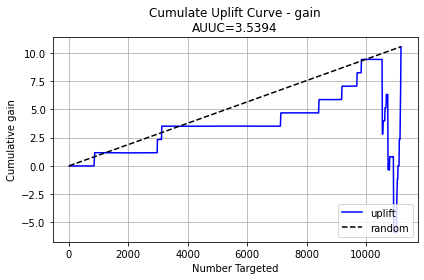

In [12]:

# Plot Uplift curve from performance
perf.plot_uplift(metric="gain", plot=True)


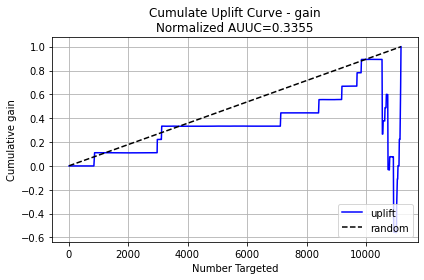

In [13]:
# Plot Normalized Uplift Curve from performance
perf.plot_uplift(metric="gain", plot=True, normalize=True)

In [14]:

# Get default AUUC (in this case Qini AUUC because auuc_type=qini)
print(perf.auuc())

3.014799700822383


In [15]:
# Get AUUC value by AUUC type (metric)
print(perf.auuc(metric="lift"))


0.000623473920549625


In [16]:
# Get normalized AUUC value by AUUC type (metric)
print(perf.auuc_normalized(metric="lift"))


0.000623473920549625


In [17]:
# Get all AUUC values in a table
print(perf.auuc_table())


AUUC table (number of bins: 880): All types of AUUC value


,uplift_type,qini,lift,gain
0,AUUC value,3.014800,0.000623,3.539359
1,AUUC normalized,0.336116,0.000623,0.335498
2,AUUC random value,4.491510,0.000473,5.282712


In [18]:
# Get thresholds and metric scores
print(perf.thresholds_and_metric_scores())


Metrics for Thresholds: Cumulative Uplift metrics for a given percentile


,thresholds,qini,lift,gain,qini_normalized,lift_normalized,gain_normalized,qini_random,lift_random,gain_random,n,idx
0,0.005868,0.0,0.0,0.0,0.0,0.0,0.0,0.012840,0.000001,0.015102,16,0
1,0.002545,0.0,0.0,0.0,0.0,0.0,0.0,0.018457,0.000002,0.021709,23,1
2,0.001714,0.0,0.0,0.0,0.0,0.0,0.0,0.028087,0.000003,0.033035,35,2
3,0.001274,0.0,0.0,0.0,0.0,0.0,0.0,0.036112,0.000004,0.042474,45,3
4,0.001149,0.0,0.0,0.0,0.0,0.0,0.0,0.044940,0.000005,0.052856,56,4
5,0.000898,0.0,0.0,0.0,0.0,0.0,0.0,0.054570,0.000006,0.064183,68,5
6,0.000786,0.0,0.0,0.0,0.0,0.0,0.0,0.084262,0.000009,0.099106,105,6
7,0.000672,0.0,0.0,0.0,0.0,0.0,0.0,0.089880,0.000009,0.105713,112,7
8,0.000598,0.0,0.0,0.0,0.0,0.0,0.0,0.107535,0.000011,0.126478,134,8
9,0.000517,0.0,0.0,0.0,0.0,0.0,0.0,0.108337,0.000011,0.127422,135,9



See the whole table with table.as_data_frame()



In [20]:
# Get Qini value
print(perf.qini())

-1.4767107445114198


In [21]:
# Get AECU value
print(perf.aecu())

-1.4767107445114198


In [22]:
# Get AECU values in a table
print(perf.aecu_table())


AECU values table: All types of AECU value


,uplift_type,qini,lift,gain
0,AECU value,-1.476711,0.000151,-1.743353
